# Fashion MNIST

The dataset, Fashion MNIST, is a collection of apparel images falling into several classes. Classes are numbered from 0 to 9 and have the following meanings with Tshirt/Top represented as 0 and an Ankle Boot as 9.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Overview

- The fashion MNIST dataset contains 60,000 (train) + 10,000 (test) article images
- Each image in the dataset has a 28x28 pixel size
- The dataset consist of 10 classes (T-shirt/Top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle Boot)
- We have images of clothes and for each image to classify what type of dress it belongs to
- For image data, the input to the neural network will be pixel values of the image
- As this dataset is a multi-class classification problem, the loss function will be Categorical Cross-Entropy Function
- In this data, each image has 28x28 pixel values, which will be flattened and passed to the neural network.

## Objective
In this exercise, we will create a simple ANN (Feed Forward Neural Network) model to classify the images into some categories. We will also use Convoluted neural network to further refine our classification

## Import the Libraries

In [1]:
# Manipulating and reading data
import numpy as np
import pandas as pd
import itertools
np.set_printoptions(precision=2)

# Visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

# Tensorflow library
# BatchNormalization for regularization
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses, optimizers
import keras.backend as K

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Import the dataset

In [2]:
# Importing the dataset
(train_image, train_labels), (test_image,test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# Check the shape of the train and test set
print(f"The shape of training set is {train_image.shape}, {train_labels.shape}")
print(f"The shape of test set is {test_image.shape}, {test_labels.shape}")

The shape of training set is (60000, 28, 28), (60000,)
The shape of test set is (10000, 28, 28), (10000,)


In [4]:
# Lets check the shape of the image after flattening, we will need to pass the flatten image to the model
print(f"The shape of training set after flattening is {np.product(train_image.shape[1:])}")

The shape of training set after flattening is 784


In [5]:
# Check what are the classes/unique values in the training outputs
np.unique(train_labels)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

There are a total of 10 classes where each class denotes one type of aparel. 

## Encoding the target variable

In [6]:
x_train = train_image
x_test = test_image
y_train = to_categorical(train_labels, num_classes=10)
y_test = to_categorical(test_labels, num_classes=10)

# Check the shape of all the dataset after encoding
print(f"The shape of training set is {x_train.shape}, {y_train.shape}")
print(f"The shape of test set is {x_test.shape}, {y_test.shape}")

The shape of training set is (60000, 28, 28), (60000, 10)
The shape of test set is (10000, 28, 28), (10000, 10)


In [7]:
## Let's normalize the dataset. Since there are pixel values ranging from 0-255, let us divide by 255 to get the new ranges from 0-1
X_train = x_train/255
X_test = x_test/255

## Visualization

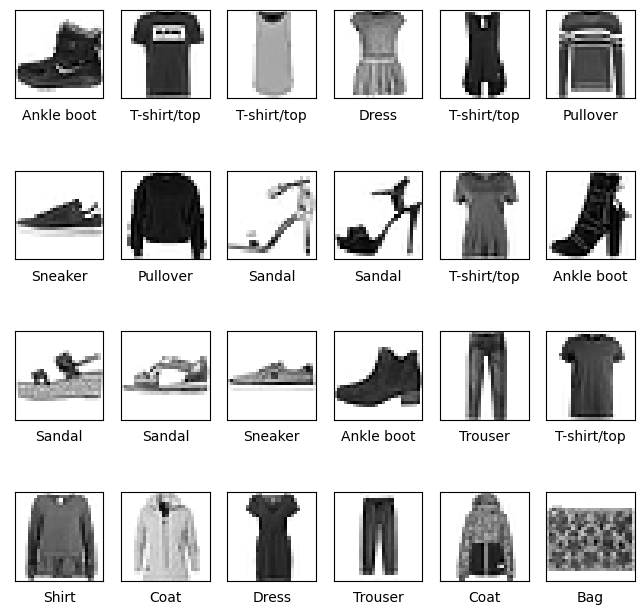

In [8]:
class_names_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(8,8))
for i in range(24):
    plt.subplot(4,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[i], cmap=plt.cm.binary)
    plt.xlabel(class_names_list[train_labels[i]])
plt.show()

In [9]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

## Model Building
### Feed Forward Neural Network

In [10]:
# Create model
# Our output layers will be 10 neurons for 10 different classes/aparels
# We select softmax activation function since it is a multi-class classification problem

ffnn_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

ffnn_opt = optimizers.Adam(learning_rate=0.001)

ffnn_model.compile(optimizer=ffnn_opt, 
                   loss='categorical_crossentropy', 
                   metrics=['accuracy'])

2023-03-13 03:44:22.847255: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
ffnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


**Observations:**
- The model has 109,386 parameters
- All the parameters are trainable

In [12]:
# Define a generic function for metric scoring
def metric_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, 
                annot=True, 
                fmt='.0f', 
                xticklabels=class_names_list, 
                yticklabels=class_names_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [13]:
# train the model
# we will leave 10% for validation and the rest is used for training
ffnn_history = ffnn_model.fit(X_train, y_train, validation_split=0.1, epochs=25, batch_size=32
                              , verbose=1)

Epoch 1/25


2023-03-13 03:44:23.120643: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


1688/1688 [==============================] - 2s 1ms/step - loss: 0.7170 - accuracy: 0.7443 - val_loss: 0.4245 - val_accuracy: 0.8405
Epoch 2/25
1688/1688 [==============================] - 2s 891us/step - loss: 0.4171 - accuracy: 0.8475 - val_loss: 0.3657 - val_accuracy: 0.8657
Epoch 3/25
1688/1688 [==============================] - 2s 927us/step - loss: 0.3728 - accuracy: 0.8630 - val_loss: 0.3560 - val_accuracy: 0.8683
Epoch 4/25
1688/1688 [==============================] - 2s 945us/step - loss: 0.3519 - accuracy: 0.8722 - val_loss: 0.3446 - val_accuracy: 0.8742
Epoch 5/25
1688/1688 [==============================] - 2s 900us/step - loss: 0.3340 - accuracy: 0.8744 - val_loss: 0.3363 - val_accuracy: 0.8743
Epoch 6/25
1688/1688 [==============================] - 1s 860us/step - loss: 0.3288 - accuracy: 0.8781 - val_loss: 0.3370 - val_accuracy: 0.8780
Epoch 7/25
1688/1688 [==============================] - 1s 852us/step - loss: 0.3121 - accuracy: 0.8841 - val_loss: 0.3379 - val_accuracy

In [14]:
# K.eval(ffnn_model.optimizer.lr)
#ffnn_model.optimizer.get_config()

def plot_validation_training_curve(model):
    list_ep = [i for i in range(1, model.history.params['epochs']+1)]
    dict_hist = model.history.history
    
    plt.figure(figsize=(8,8))
    plt.plot(list_ep, dict_hist['accuracy'], ls='--', label='accuracy')
    plt.plot(list_ep, dict_hist['val_accuracy'], ls='--', label='val_accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

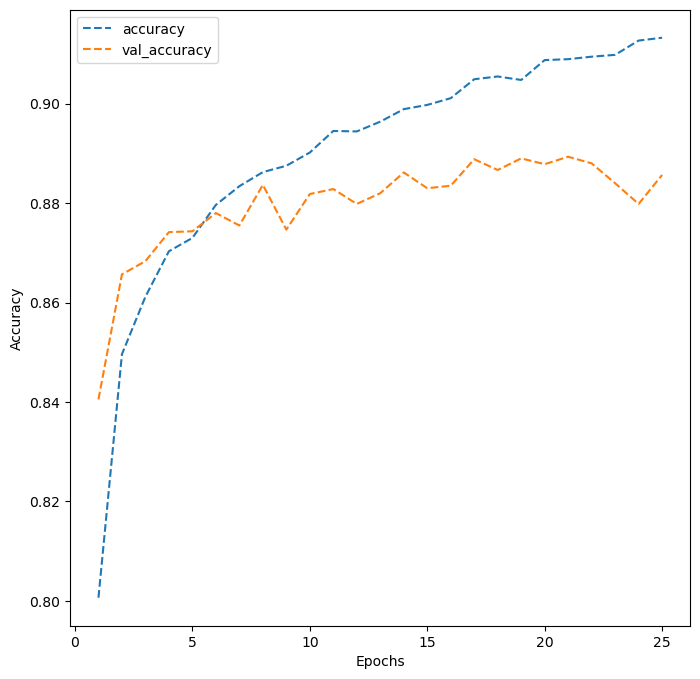

In [15]:
plot_validation_training_curve(ffnn_model)

There is some overfitting from the model since validation accuracy is lower than training accuracy.

1875/1875 [==============================] - 2s 840us/step - loss: 0.2009 - accuracy: 0.9253
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1000
           1       1.00      0.96      0.98      1000
           2       0.77      0.83      0.80      1000
           3       0.89      0.89      0.89      1000
           4       0.84      0.75      0.79      1000
           5       0.98      0.97      0.97      1000
           6       0.70      0.71      0.71      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



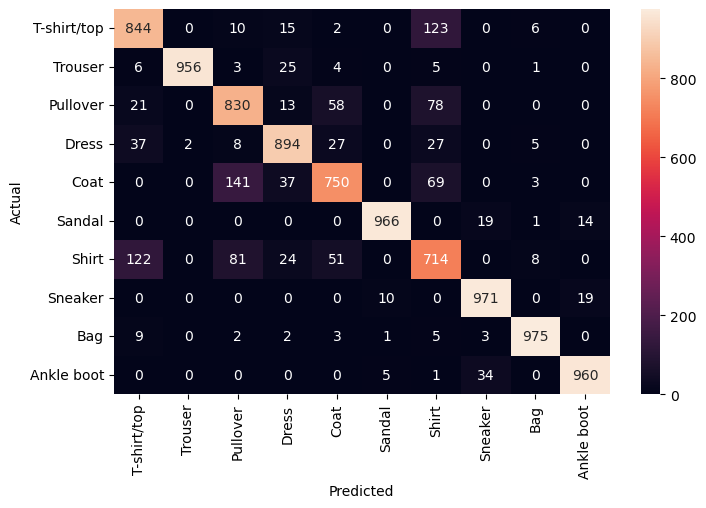

In [16]:
ffnn_model.evaluate(X_train, y_train, verbose=1)
yhat_ffnn = np.argmax(ffnn_model.predict(X_test), axis=-1)
metric_score(test_labels, yhat_ffnn)

The confusion matrix shows that the model was not able to differentiate properly on the following apparel (particularly class 4 and class 6):
1. T-shirt/Top and Shirt
2. Shirt and Coat
3. Pullover and Coat
4. Pullover and Shirt

#### Visualize the images from the test data

In [17]:
def plot_visual(model, ypredict, X_test):
    rows = 4
    cols = 6
    fig = plt.figure(figsize=(15, 15))
    for i in range(cols):
        for j in range(rows):
            random_index = np.random.randint(0, len(test_labels))
            ax = fig.add_subplot(rows, cols, i*rows+j+1)
            ax.imshow(X_test[random_index, :])
    
            pred_label = class_names_list[ypredict[random_index]]
            true_label = class_names_list[test_labels[random_index]]
            y_pred_test_max_probas = np.max(model.predict(X_test), axis=1)
            pred_proba = y_pred_test_max_probas[random_index]
            ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
                true_label, pred_label, pred_proba
            ))
    plt.show()
        

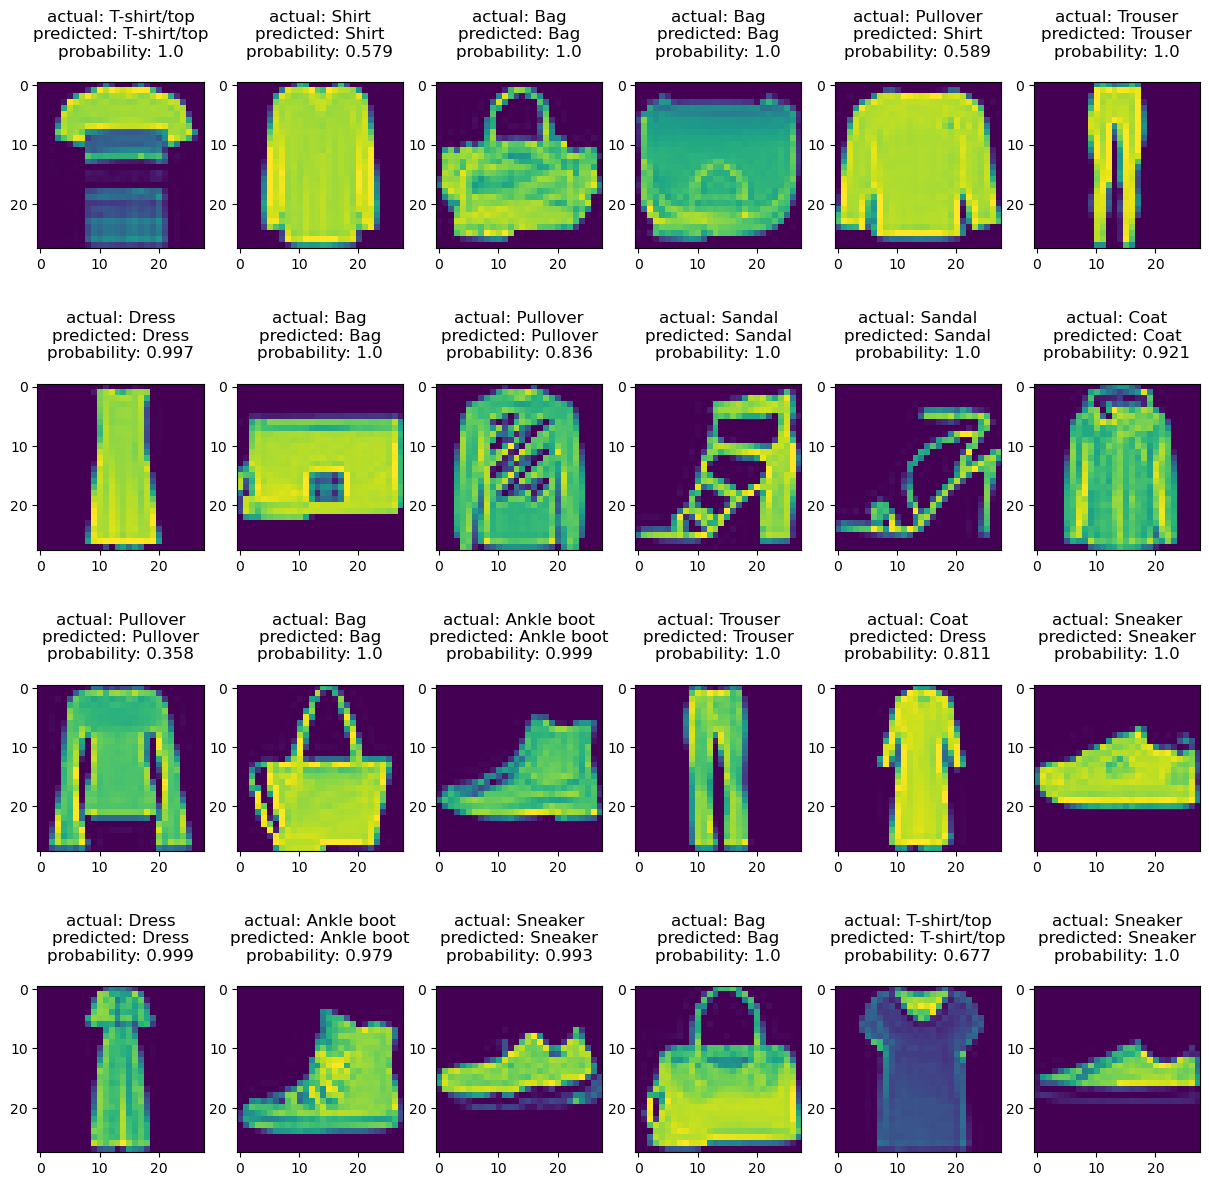

In [18]:
plot_visual(ffnn_model, yhat_ffnn, X_test)

### Convolution Neural Network (CNN)

In [31]:
X_train_cnn = train_image.reshape(train_image.shape[0], 28, 28, 1)
X_test_cnn = test_image.reshape(test_image.shape[0], 28, 28, 1)
X_train_cnn = X_train_cnn/255
X_test_cnn = X_test_cnn/255

cnn_model = Sequential([
    Conv2D(filters=16, kernel_size=(3,3), padding="same", input_shape=(28, 28, 1)),
    LeakyReLU(0.1),
    Conv2D(filters=32, kernel_size=(3,3), padding="same"),
    LeakyReLU(0.1),
    MaxPool2D(pool_size=(2,2)),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3,3), padding="same"),
    LeakyReLU(0.1),
    Conv2D(filters=64, kernel_size=(3,3), padding="same"),
    LeakyReLU(0.1),
    MaxPool2D(pool_size=(2,2)),
    BatchNormalization(),
    Flatten(),
    Dense(64),
    LeakyReLU(0.1),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

adam_opt = optimizers.Adam(learning_rate=0.001)
cnn_model.compile(loss=losses.categorical_crossentropy, optimizer=adam_opt, metrics=['accuracy'])

In [32]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)       

- The model has 234,346 parameters. The majority of parameters belong to the single dense layer with 64 nodes.
- All the parameters are trainable

In [33]:
cnn_history = cnn_model.fit(X_train_cnn, y_train, validation_split=0.1, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
422/422 [==============================] - 48s 112ms/step - loss: 0.6473 - accuracy: 0.7817 - val_loss: 0.6616 - val_accuracy: 0.7678
Epoch 2/10
422/422 [==============================] - 47s 111ms/step - loss: 0.3129 - accuracy: 0.8875 - val_loss: 0.3035 - val_accuracy: 0.8857
Epoch 3/10
422/422 [==============================] - 47s 112ms/step - loss: 0.2531 - accuracy: 0.9087 - val_loss: 0.2550 - val_accuracy: 0.9037
Epoch 4/10
422/422 [==============================] - 50s 117ms/step - loss: 0.2227 - accuracy: 0.9196 - val_loss: 0.2290 - val_accuracy: 0.9137
Epoch 5/10
422/422 [==============================] - 49s 117ms/step - loss: 0.1974 - accuracy: 0.9272 - val_loss: 0.2265 - val_accuracy: 0.9178
Epoch 6/10
422/422 [==============================] - 50s 118ms/step - loss: 0.1789 - accuracy: 0.9330 - val_loss: 0.2397 - val_accuracy: 0.9155
Epoch 7/10
422/422 [==============================] - 50s 117ms/step - loss: 0.1639 - accuracy: 0.9392 - val_loss: 0.2158 - val_ac

In the CNN model, we added batch normalization and dropout to help in reducing the overfitting which occurs in the feed-forward neural network. From the metrics, we can see that the CNNs model is still overfitting but less compared to the feed-forward neural network.

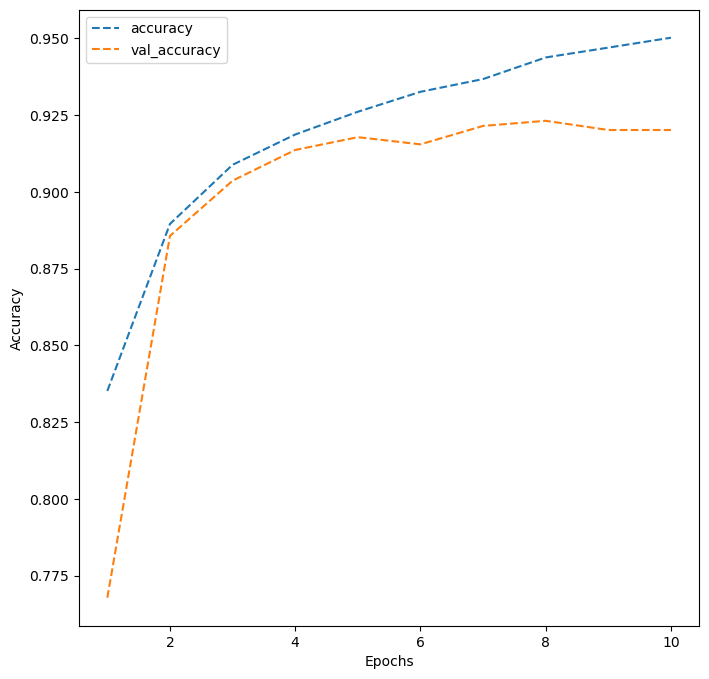

In [34]:
plot_validation_training_curve(cnn_model)

1875/1875 [==============================] - 14s 8ms/step - loss: 0.1049 - accuracy: 0.9616
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.91      0.83      0.87      1000
           3       0.91      0.91      0.91      1000
           4       0.86      0.90      0.88      1000
           5       0.99      0.98      0.98      1000
           6       0.72      0.79      0.75      1000
           7       0.95      0.98      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



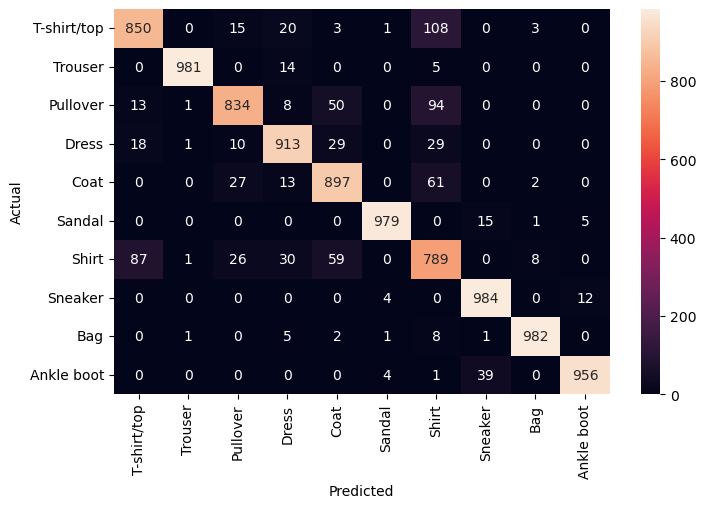

In [35]:
cnn_model.evaluate(X_train_cnn, y_train, verbose=1)
yhat_cnn = np.argmax(cnn_model.predict(X_test_cnn), axis=-1)
metric_score(test_labels, yhat_cnn)

#### Visualize the images from the test data

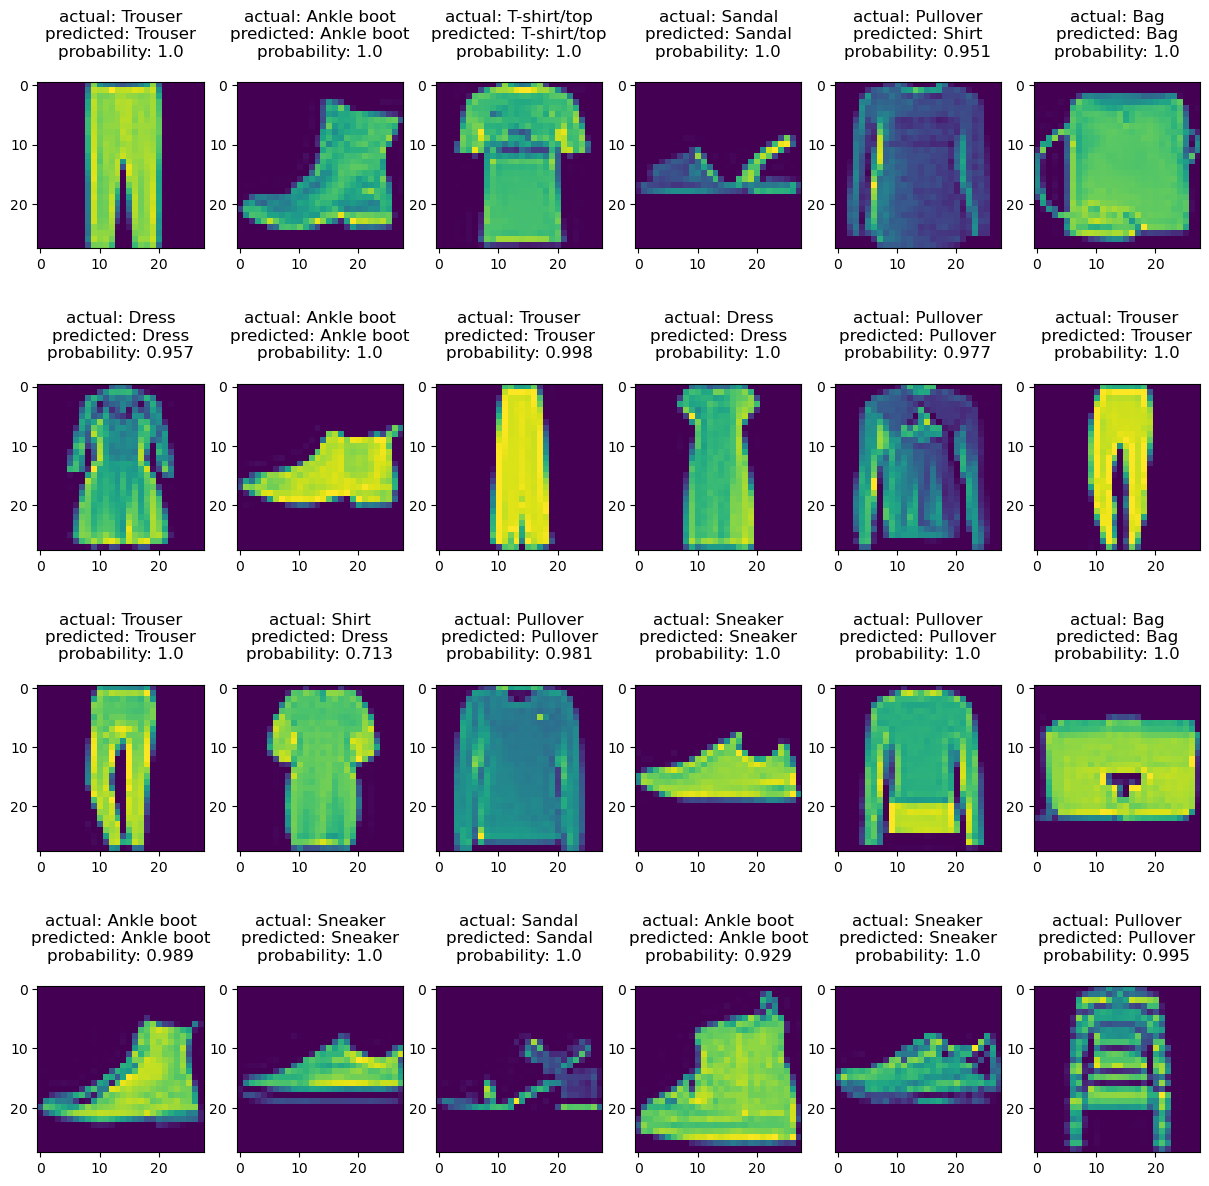

In [36]:
plot_visual(cnn_model, yhat_cnn, X_test_cnn)

**Observations:**
1. The performance of the CNN model performs better than feed-forward neural network, suggesting thatn CNNs are a better choice for this particular dataset. We can see that the CNNs model classify the shirt and T-shirt/Top and Coat and Shirt better although there are still some confusion.
2. For class 6 (Pullover), the CNNs model only perform slightly better (4% better) compared to feed-forward neural network
3. 5 of the classes (namely class 1, 5, 7, 8, 9 which represent Trouser, Sandal, Sneaker, Bag and Ankle boot) have precision higher than 95% and the recall is also higher than 95%. The precision values shows that the model is precise in its prediction without much sacrifice to recall.

**Suggestion for Next Step (Revisit)**
- We can try hyperparameter tuning to get an even better performance
- Data Augmentation might help to make the model more robust and invariant towards different orientations
- We can try technique like transfer learning to see if better results can be achieve.